In [3]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download(url, save_path):
    print(f"Stahuji a rozbaluji obrázky....", end="")

    urlretrieve(url, save_path)

    # Rozbalení souboru
    with ZipFile(save_path) as z:
        z.extractall(os.path.split(save_path)[0])

    print("Hotovo")

In [5]:
# používáme raw string
url = r"https://gitlab.mff.cuni.cz/cermp5am/automation/-/raw/af1b5e37c552c87be942283bfd18b8d111aa3a78/04-opencv/samples.zip"

zip_path = os.path.join(os.getcwd(), f"samples.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(zip_path):
    download(url, zip_path)   

Stahuji a rozbaluji obrázky....Hotovo


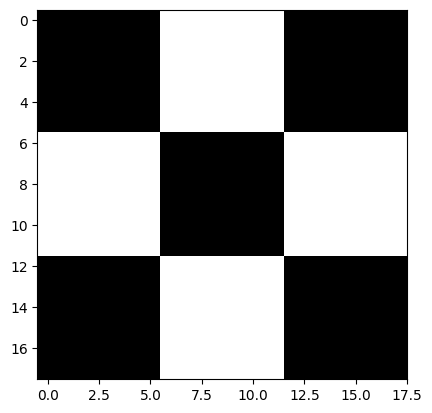

In [16]:
# Read image as gray scale.
cb_img = cv.imread("checkerboard_18x18.png")
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img)
# print(cb_img)

In [10]:
(cb_img == None)

True

In [18]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

[0 0 0]
[255 255 255]


In [31]:
a = list(range(10))
a[-2::-2]
type(a)

list

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

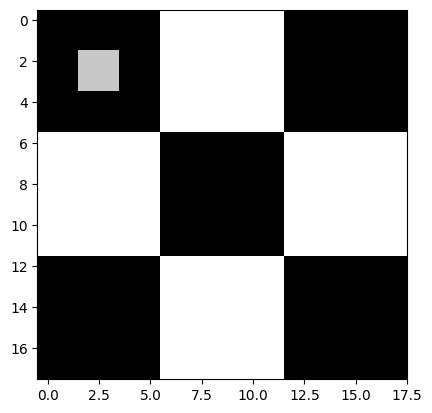

In [9]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

In [19]:
cb_img[:,:,0]

array([[  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,

In [4]:
!pip install opencv-python


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


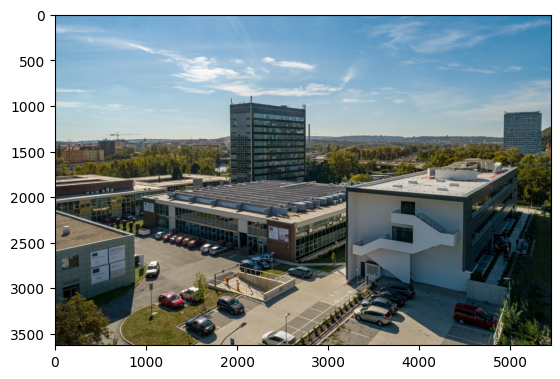

In [14]:

img_NZ_bgr = cv.imread("DJI_0089-HDR-Edit.jpg", cv.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(cv.cvtColor(img_NZ_bgr, cv.COLOR_BGR2RGB))

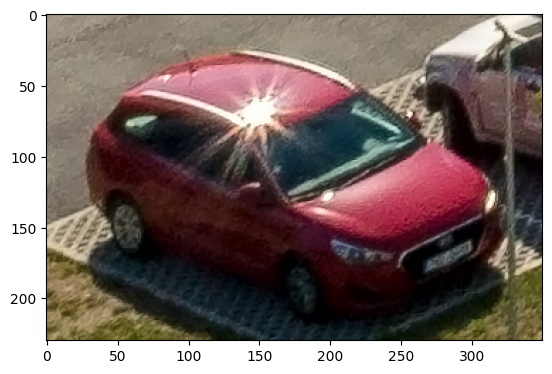

In [36]:
c = img_NZ_rgb[3020:3250, 1100:1450]
plt.imshow(c)

Text(0.5, 1.0, 'Original')

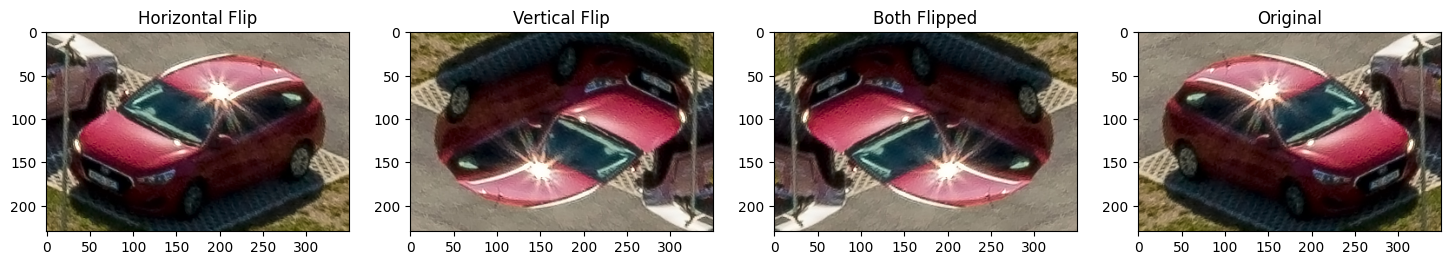

In [31]:
cropped_flipped_horz = cv2.flip(cropped_region, 1)
cropped_flipped_vert = cv2.flip(cropped_region, 0)
cropped_flipped_both = cv2.flip(cropped_region, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(cropped_flipped_horz);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(cropped_flipped_vert);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(cropped_flipped_both);plt.title("Both Flipped")
plt.subplot(144);plt.imshow(cropped_region);plt.title("Original")

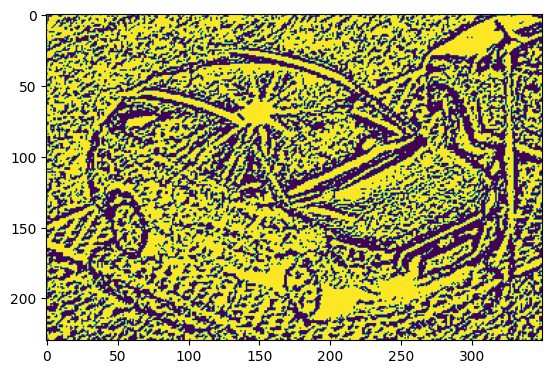

In [41]:
#c = cv.cvtColor(c, cv.COLOR_RGB2GRAY)
d = cv.adaptiveThreshold(c, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(d)

In [35]:
c

array([[[154, 142, 126],
        [157, 145, 129],
        [155, 143, 127],
        ...,
        [100, 100,  90],
        [115, 115, 105],
        [107, 107,  99]],

       [[159, 147, 131],
        [152, 140, 124],
        [151, 139, 123],
        ...,
        [ 90,  90,  80],
        [ 79,  79,  69],
        [ 74,  74,  64]],

       [[160, 148, 132],
        [155, 143, 127],
        [164, 152, 136],
        ...,
        [144, 141, 132],
        [115, 115, 105],
        [ 94,  94,  84]],

       ...,

       [[ 92,  78,  31],
        [136, 122,  75],
        [151, 135,  86],
        ...,
        [156, 140,  89],
        [164, 146,  96],
        [162, 144,  94]],

       [[110,  96,  49],
        [138, 122,  73],
        [149, 133,  84],
        ...,
        [175, 157, 107],
        [178, 160, 110],
        [157, 141,  90]],

       [[138, 122,  73],
        [131, 115,  66],
        [155, 137,  87],
        ...,
        [165, 147,  99],
        [154, 138,  87],
        [129, 113,  64]]